In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

# Load dataset
df = pd.read_csv("/content/mobile_battery_drain_dataset.csv")
display(df.head())
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Target column
target_col = df.columns[-1]

# Features & target
X = df.drop(target_col, axis=1)
y_reg = df[target_col]

# Classification label
threshold = y_reg.mean()
y_cls = (y_reg > threshold).astype(int)

# Train-test split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

_, _, y_train_cls, y_test_cls = train_test_split(
    X, y_cls, test_size=0.2, random_state=42
)

# -------- Linear Regression --------
lr = LinearRegression()
lr.fit(X_train, y_train_reg)
print("Linear Regression MSE:",
      mean_squared_error(y_test_reg, lr.predict(X_test)))

print()  # spacing

# -------- Logistic Regression --------
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train_cls)
print("Logistic Regression Accuracy:",
      accuracy_score(y_test_cls, logr.predict(X_test)))

print()  # spacing



# -------- KNN Classification --------
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train, y_train_cls)
print("KNN Classification Accuracy:",
      accuracy_score(y_test_cls, knn_cls.predict(X_test)))

print()  # spacing

# -------- KNN Regression --------
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train_reg)
print("KNN Regression MSE:",
      mean_squared_error(y_test_reg, knn_reg.predict(X_test)))


,screen_time_hours,app_usage_minutes,brightness_level,background_apps,network_type,gaming_time_minutes,battery_health_percent,battery_drain_percent
0,4.37,80,51,17,2,64,72,62.93
1,9.56,100,99,3,3,130,80,93.37
2,7.59,77,20,1,1,42,76,58.08
3,6.39,48,96,18,3,49,87,72.55
4,2.40,291,73,18,1,136,82,79.55


Linear Regression MSE: 26.2135328773118

Logistic Regression Accuracy: 0.903

KNN Classification Accuracy: 0.741

KNN Regression MSE: 130.95534014400002


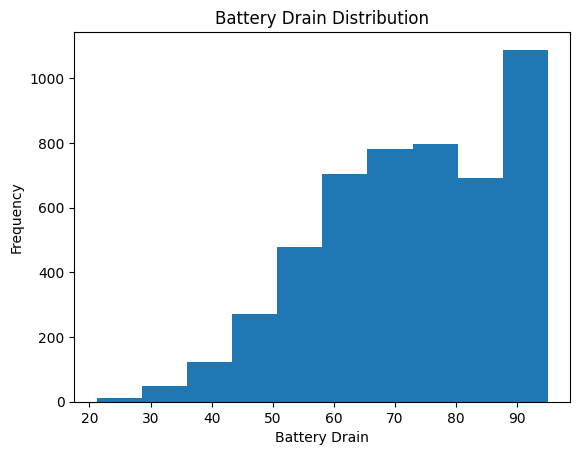

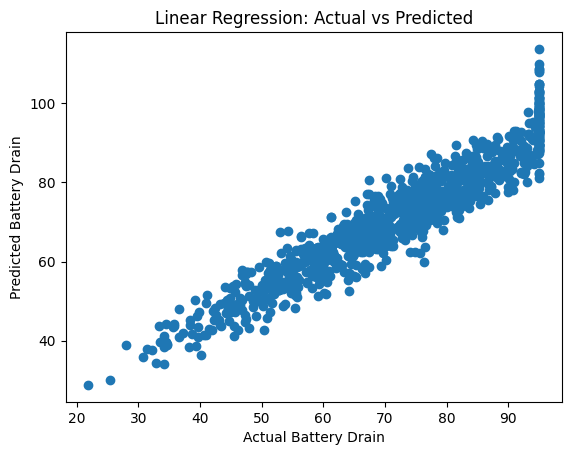

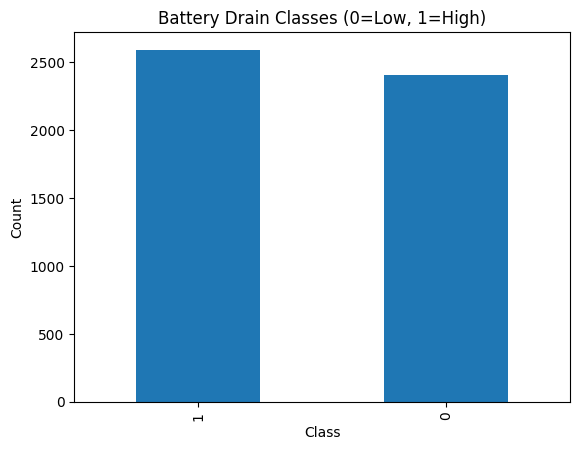

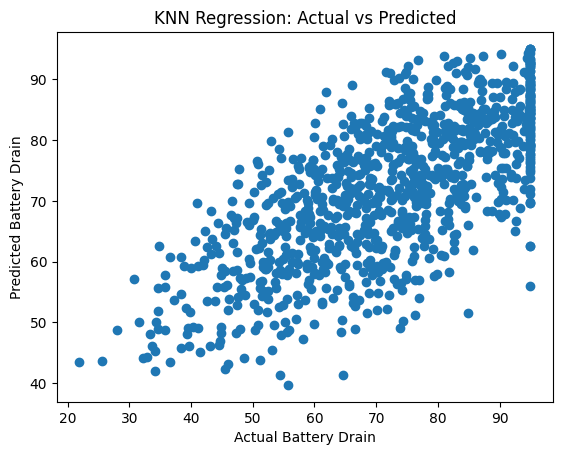

In [ ]:
import matplotlib.pyplot as plt

# ---------- 1. Battery Drain Distribution ----------
plt.figure()
plt.hist(y_reg, bins=10)
plt.title("Battery Drain Distribution")
plt.xlabel("Battery Drain")
plt.ylabel("Frequency")
plt.show()

# ---------- 2. Linear Regression: Actual vs Predicted ----------
plt.figure()
plt.scatter(y_test_reg, lr.predict(X_test))
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Battery Drain")
plt.ylabel("Predicted Battery Drain")
plt.show()

# ---------- 3. Logistic Regression Class Distribution ----------
plt.figure()
y_cls.value_counts().plot(kind='bar')
plt.title("Battery Drain Classes (0=Low, 1=High)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# ---------- 4. KNN Regression: Actual vs Predicted ----------
plt.figure()
plt.scatter(y_test_reg, knn_reg.predict(X_test))
plt.title("KNN Regression: Actual vs Predicted")
plt.xlabel("Actual Battery Drain")
plt.ylabel("Predicted Battery Drain")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

# Load dataset
df = pd.read_csv("/content/mobile_battery_drain_dataset.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Target column
target_col = df.columns[-1]

# Features and target
X = df.drop(target_col, axis=1)
y_reg = df[target_col]

# Classification label for Logistic Regression
threshold = y_reg.mean()
y_cls = (y_reg > threshold).astype(int)

# Single train-test split
X_train, X_test, y_train_reg, y_test_reg, y_train_cls, y_test_cls = train_test_split(
    X, y_reg, y_cls, test_size=0.2, random_state=42
)

# -------- Linear Regression --------
lr = LinearRegression()
lr.fit(X_train, y_train_reg)
mse=mean_squared_error(y_test_reg, lr.predict(X_test))
print(f"Linear Regression MSE:{mse:.2f}")

print()

# -------- Logistic Regression --------
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train_cls)
print("Logistic Regression Accuracy:",
      accuracy_score(y_test_cls, logr.predict(X_test)))

print()

# -------- KNN Regression --------
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train_reg)
print("KNN Regression MSE:",
      mean_squared_error(y_test_reg, knn_reg.predict(X_test)))

print("\n--- Sample Prediction ---")

# Take one sample from dataset
sample = X.iloc[[0]]

# Linear Regression Prediction
lr_pred = lr.predict(sample)[0]

# Logistic Regression Prediction
log_pred = logr.predict(sample)[0]
log_prob = logr.predict_proba(sample)[0][1]

# KNN Regression Prediction
knn_pred = knn_reg.predict(sample)[0]

print(f"Linear Regression Predicted Drain:{lr_pred:.2f}")
print("KNN Regression Predicted Drain:", round(knn_pred, 2))

print("Logistic Regression Class:", log_pred)
print("Probability of High Drain:", round(log_prob, 2))

if log_pred == 1:
    print("Result: High Battery Drain Expected")
else:
    print("Result: Low Battery Drain Expected")


Linear Regression MSE:26.21

Logistic Regression Accuracy: 0.903

KNN Regression MSE: 130.95534014400002

--- Sample Prediction ---
Linear Regression Predicted Drain:68.07
KNN Regression Predicted Drain: 69.82
Logistic Regression Class: 0
Probability of High Drain: 0.19
Result: Low Battery Drain Expected
